In [1]:
import json
import pandas as pd

In [2]:
path = '../output/data/replay_buffer_ca1_1666161518_1.json'
with open(path, 'r') as f:
    jsonstr = f.read()
    datas = json.loads(jsonstr)

In [3]:
[len(traj) for traj in datas]

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 7,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 4,
 5,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 11,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 5,
 7,
 3,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 9,
 3,
 3,
 3,
 3,
 3,

In [7]:
steps = datas[3]
len(steps)

3

In [8]:
INDEXS_2_PIECES = 'KARBNPCkarbnpc'

In [9]:
def check_capture(state_from, state_to):
    """检测从state_from到state_to被吃掉哪些棋子，如果没出现吃棋，则返回空数组"""
    state_from_dict = dict()
    for c in INDEXS_2_PIECES:
        state_from_dict[c] = 0

    state_to_dict = state_from_dict.copy()

    for c in state_from:
        if c in state_from_dict:
            state_from_dict[c] += 1

    for c in state_to:
        if c in state_to_dict:
            state_to_dict[c] += 1
    
    capture_list = []
    for key, count in state_from_dict.items():
        if count > state_to_dict[key]:
            capture_list.append(key)

    return capture_list

In [10]:
capture_steps = list()
for index, item in enumerate(steps):
    if index + 1 < len(steps):
        next_item = steps[index + 1]
        captures = check_capture(item[0], next_item[0])
        capture_steps.append(captures)
capture_steps.append('end')

In [11]:
len(capture_steps)

3

In [12]:
rewards = [x[2] for x in steps]

In [13]:
step_data = pd.DataFrame({'reward': rewards, 'captures': capture_steps})

In [14]:
step_data.head()

,reward,captures
0,-2.387279,[N]
1,-0.612721,[K]
2,-1.000000,end


In [15]:
import matplotlib.pyplot as plt

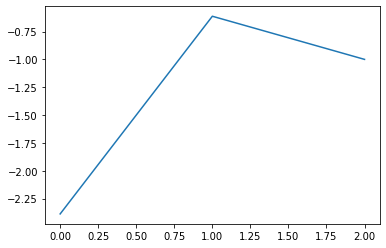

In [16]:
plt.plot(range(len(rewards)), rewards)

In [24]:
sum([2, 34, 2, 5])

43